In [1]:
import numpy as np
from numpy import nan as NA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv('costmanagementexport.csv').T.dropna().T

In [3]:
len_row, len_col = df.shape
df.shape

(1709, 46)

In [4]:
one_val = []
for i in df:
    if len(df[i].drop_duplicates()) > 1:
        continue
    else:
        one_val.append(i)

print("Following columns are marked for delete: \n" + str(one_val)) # columns with only one value in it

Following columns are marked for delete: 
['billingAccountId', 'billingAccountName', 'invoiceSectionName', 'servicePeriodEndDate', 'servicePeriodStartDate', 'productOrderName', 'publisherType', 'publisherName', 'chargeType', 'billingCurrency', 'pricingCurrency', 'exchangeRatePricingToBilling', 'exchangeRateDate', 'isAzureCreditEligible', 'frequency', 'pricingModel', 'provider']


In [5]:
# Remove columns
df1 = df.drop(one_val, axis = 1)
df1.shape

(1709, 29)

In [8]:
test = pd.crosstab(df.billingProfileName, df.pricingModel, margins=True)
test

pricingModel,OnDemand,All
billingProfileName,,
Billing Profile 1,1474,1474
Billing Profile 2,235,235
All,1709,1709


<AxesSubplot:xlabel='PayGPrice', ylabel='billingProfileName'>

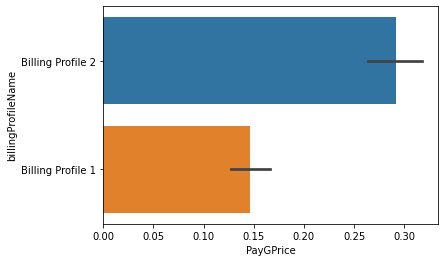

In [15]:
sns.barplot(x=df.PayGPrice, y=df.billingProfileName)


In [22]:
df2 = df1.nunique(axis=0)

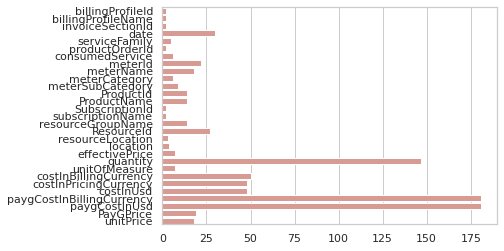

In [49]:
from ctypes import sizeof


sns.set_theme(style="whitegrid")
ax = sns.barplot(x=df2, y=df2.index, color="salmon", saturation=.5)
#plt.subplot(111,autoscaley_on=True)
#sns.barplot(x=df2, y=df2.index)
